# Исследование надежности заемщиков


## Откроем датасет и изучим общую информацию о данных

**Импортируем библиотеку pandas и считаем данные из csv-файла в датафрейм, сохраним их в переменную `data`.**

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Выведим первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Выведем основную информацию о датафрейме с помощью метода `info()`.**

<a id='item_1_1'></a> [Переход к шагу 3](#item_2_7_1_1)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Выведем количество пропущенных значений для каждого столбца. Используем комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**<a id='item_1_2'></a> Для ответа в задании [2.7.5](#item_2_7_5) до проведения предобработки датафрейма проверим, в одних и тех же ли строках пропуски в столбцах `days_employed` и `total_income`, т.к. количество пропусков совпадает и равно 2174. А также как распределены данные пропуски по значениям в столбцах `dob_years`, `education_id`, `family_status_id`, `gender`, `income_type`, `debt`**

**Выведем сначала количество строк, в которых одновременно пропущены значения в столбце `days_employed` и в столбце `total_income`, используя логическую индексацию и метод `count()`.**

In [5]:
data.loc[(data['days_employed'].isna()) & (data['total_income'].isna())]['debt'].count()

2174

Видим, что значение совпадает с количество пропусков в каждом из столбцов `days_employed` и `total_income`. Можно сделать вывод, что пропуски в обоих столбцах соответствуют одним и тем же строка датафрейма `data`.

**Проверим поочередно, как распределены данные пропуски в датафрейме `data` по значениям в столбцах `dob_years`, `education_id`, `family_status_id`, `gender`, `income_type`, `debt`, используя логическую индексацию и метод `value_counts()` с параметром `normalize=True` для получения результата в долях от общего числа пропусков.**

**Начнем с распределения по столбцу `dob_years`, но дополнительно применим функцию `cut()`, где на первом месте аргумента поставим отсортированный столбец `dob_years`, а на втором месте аргумента поставим 5 для разбивания всех значений возраста на 5 равных диапазонов. Добавим также условие возраста не ниже 19 лет, т.к. после всех предобработок ниже мы уже знаем, что "полезные" данные у нас начинаются от 19 лет и выше.**

In [6]:
pd.cut(data.loc[(data['total_income'].isna()) & (data['dob_years'] >= 19)]['dob_years'], 5).value_counts(normalize=True).sort_values()

(62.2, 73.0]      0.067930
(18.946, 29.8]    0.138170
(51.4, 62.2]      0.237985
(40.6, 51.4]      0.264325
(29.8, 40.6]      0.291590
Name: dob_years, dtype: float64

Какой-то явной зависимости пропусков в датафрейме от диапазонов возраста мы здесь не видим. Но наименьший процент пропусков соответствует возрасту от 18 до 30 и от 62 до 73 лет.

**Далее посмотрим распределения пропусков по столбцу `education_id` и выведем строкой ниже до удаления неявных дубликатов соответствие значений столбца `education_id` и `education` для двух первых строк**

In [7]:
print(data[data['total_income'].isna()]['education_id'].value_counts(normalize=True))
data[data['education_id'] <= 1][['education', 'education_id']].head(2)

1    0.708372
0    0.250230
2    0.031739
3    0.009660
Name: education_id, dtype: float64


,education,education_id
0,высшее,0
1,среднее,1


Видим, что большего всего пропусков соответствует значению `'среднее'` ~71% и значению `'высшее'` ~25%.

**Далее посмотрим распределения пропусков по столбцу `family_status_id` и выведем строкой ниже до удаления неявных дубликатов соответствие значений столбца `family_status_id` и `family_status`.**

In [8]:
print(data[data['total_income'].isna()]['family_status_id'].value_counts(normalize=True))
data.groupby('family_status')['family_status_id'].unique()

0    0.568997
1    0.203312
4    0.132475
3    0.051518
2    0.043698
Name: family_status_id, dtype: float64


family_status
Не женат / не замужем    [4]
в разводе                [3]
вдовец / вдова           [2]
гражданский брак         [1]
женат / замужем          [0]
Name: family_status_id, dtype: object

Видим, что больше всего пропусков соответствуют значению `'женат / замужем'` ~57% и значению `'гражданский брак'` ~20%.

**Далее посмотрим распределения пропусков по столбцу `gender`.**

In [9]:
data[data['total_income'].isna()]['gender'].value_counts(normalize=True)

F    0.682613
M    0.317387
Name: gender, dtype: float64

Видим, что больше всего пропусков соответствуют значению `'F'` ~68%.

**Далее посмотрим распределения пропусков по столбцу `income_type`.**

In [10]:
data[data['total_income'].isna()]['income_type'].value_counts(normalize=True)

сотрудник          0.508280
компаньон          0.233671
пенсионер          0.189972
госслужащий        0.067617
предприниматель    0.000460
Name: income_type, dtype: float64

Видим, что больше всего пропусков соответствуют значению `'сотрудник'` ~51% и значению `'компаньон'` ~23%.

**Далее посмотрим распределения пропусков по столбцу `debt`.**

In [11]:
data[data['total_income'].isna()]['debt'].value_counts(normalize=True)

0    0.921803
1    0.078197
Name: debt, dtype: float64

Видим, что больше всего пропусков соответствуют значению `'0'` ~92%, что соответствует отсутствию задолженности по кредитам.

[Переход к вопросу 2.7.5](#item_2_7_5)

**В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце обработаем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполним пропуски в этом столбце медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`.**

In [13]:
data['days_employed'] = data['days_employed'].abs()

**Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.**

In [14]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится для исследования.

**Выведем перечень уникальных значений столбца `children`.**

In [15]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Оценим какое количество строк данных будет потеряно в случае удаления строк с аномальными значениями в столбце `children`.**

In [16]:
data[(data['children'] == -1) | (data['children'] == 20)]['children'].count()

123

Получаем значение менее 1% от всех данных, что можно считать не критичным уменьшением данных для анализа.

**В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [17]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [18]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолженине)

**Заполним пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`.**

In [19]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Убедимся, что все пропуски заполнены. Проверим себя и ещё раз выведем количество пропущенных значений для каждого столбца с помощью двух методов.**

In [20]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [21]:
data['total_income'] = data['total_income'].astype('int')

### Обработка дубликатов

**Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру.**

In [22]:
data['education'] = data['education'].str.lower()

**Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.**

<a id='item_2_5'></a> [Переход к шагу 3](#item_2_7_1_2)

In [23]:
data.duplicated().sum()

71

In [24]:
data = data.drop_duplicates()

### Категоризация данных

**На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 назначим категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используем собственную функцию с именем `categorize_income()` и метод `apply()`.**

[К пункту 2.7.1.1](#item_2_7_1_1_2) <a id='item_2_6_1'></a>

In [25]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [26]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [27]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` появится строка `'операции с автомобилем'`.**

**Используем собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучим данные в столбце `purpose` и определим, какие подстроки помогут правильно определить категорию.**

In [28]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [29]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### 3. Исследуем данные

#### 3.1 Проверим, есть ли зависимость между количеством детей и возвратом кредита в срок.

##### Перед тем, как переходить к исследованию зависимости из п.2.7.1, необходимо дополнительно проверить, что предобработка данных датафрейма `data` выполнена полностью и с ними можно продолжать работу.

**<a id='item_2_7_1_2'></a> Ранее мы удаляли строки с явными дубликатами ([тут](#item_2_5)) и не сбросили индексацию в датафрейме `data`. Сделаем это сейчас с помощью метода `reset_index()` c параметром `drop=True`, не сохраняя тем самым старую индексацию.**

In [30]:
data = data.reset_index(drop=True)

**После проведения всех операций с данными выше проверим текущую информацию о датафрейме `data`, используя метод `info()`.**

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21331 entries, 0 to 21330
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               21331 non-null  int64  
 1   days_employed          21331 non-null  float64
 2   dob_years              21331 non-null  int64  
 3   education              21331 non-null  object 
 4   education_id           21331 non-null  int64  
 5   family_status          21331 non-null  object 
 6   family_status_id       21331 non-null  int64  
 7   gender                 21331 non-null  object 
 8   income_type            21331 non-null  object 
 9   debt                   21331 non-null  int64  
 10  total_income           21331 non-null  int64  
 11  purpose                21331 non-null  object 
 12  total_income_category  21331 non-null  object 
 13  purpose_category       21331 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 2.3+ 

Видим, что после удаления строк с аномальными данными в столбце `children` и удаления явных дубликатов количество строк в датафрейме `data` уменьшилось с  21525 до  21331 по сравнению с исходным датафреймом ([информация об исходном DF](#item_1_1)), что составляет менее 1% от всех строк. 
Такое уменьшение количества данных считаем некритичным влиянием на дальнейшее исследование и можем продолжить его.  <a id='item_2_7_1_1'></a>

Также мы видим, что все столбцы теперь не имеют пропусков (объектов `NaN` \ `None`), и все столбцы имеют одинаковое количество строк.

**Оценим теперь обновленные данные. Выведем первые 20 строк обновленного датафрейма `data`**

In [32]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


Первое, что бросается в глаза - тип float столбца `days_employed`, хотя нам для исследования будет достаточно для данного параметра целочисленных значений, поэтому переведем значения данного столбца в тип `int`.

Типы данных количественных переменных и категориальных соответствуют целевым.

**Переведем данные в столбце `days_employed` в целочисленный тип, применяя метод `astype()`**

In [33]:
data['days_employed'] = data['days_employed'].astype('int')

**После всех преобразований проверим данные в тех столбцах датафрейма `data`, которые не были проверены до этого на неявные дубликаты и ошибки, используя метод `unique()`. Применим ее поочередно к столбцам `dob_years`, `education`,`education_id`, `family_status`, `family_status_id`, `gender`,`income_type`, `debt`.**

**Применяем метод `unique()` к столбцу `dob_years` датафрейма `data`. Сразу же отсортируем данные по возрастанию с помощью метода `sort_values()`**

In [34]:
data['dob_years'].sort_values().unique()

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

Видим, что есть часть строк со значением 0, что является некорректным значением возраста.

**Уточним, какое количество строк имеет возраст в столбце `dob_years` равный 0. Узнаем это с помощью логической индексации датафрейма `data` и метода `count()`.**

In [35]:
data[data['dob_years'] == 0]['dob_years'].count()

100

Количество строк с возрастом равным 0 составляет 100, что общего числа строк 21331 составляет менее 0,5%.

**Удалим строки, в которых возраст (значения столбца `dob_years`) равен аномальному значению 0 и сбрасываем индексацию в датафрейме `data` с помощью метода `reset_index()` c параметром `drop=True`, не сохраняя тем самым старую индексацию.**

In [36]:
data = data[data['dob_years'] != 0].reset_index(drop=True)

**Проверим теперь уникальные значения возраста в столбце `dob_years` датафрейма `data`.**

In [37]:
data['dob_years'].sort_values().unique()

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75])

Видим, что строки с нулевым возрастом были успешно удалены.

**Применяем метод `unique()` к столбцу `education` датафрейма `data`.**

In [38]:
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

С уникальностью значений все хорошо, в этом столбце нет неявных дубликатов.

**Применяем метод `unique()` к столбцу `education_id` датафрейма `data`.**

In [39]:
data['education_id'].unique()

array([0, 1, 2, 3, 4])

Можно сделать вывод, что количество уникальных идентификаторов в столбце `education_id` равно количеству уникальных значений в столбце `education`.

**Проверим теперь правильно ли соотносятся столбцы `education` и `education_id` во всех строках датафрейма `data`. Для этого используем метод для расчета среднего значения `mean()` по столбцу `education_id` для датафрейма `data` сгруппированного по значениям столбца `education`. 
Если значения данных столбцов соотнесены без ошибок во всех строках, мы получим в результате применения метода в каждом из случаев целочисленное значение.**

In [40]:
data.groupby('education')['education_id'].mean()

education
высшее                 0
начальное              3
неоконченное высшее    2
среднее                1
ученая степень         4
Name: education_id, dtype: int64

Делаем вывод, значения столбцов `education` и `education_id` соотнесены верно.

**Применяем метод `unique()` к столбцу `family_status` датафрейма `data`.**

In [41]:
data['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

С уникальностью значений все хорошо, в этом столбце нет неявных дубликатов. Но одно из значений имеет прописную букву.

**Приведем все значения к стандарту из строчных букв. Для этого применим метод `str.lower()` ко всем значениям в столбце `family_status`.**

In [42]:
data['family_status'] = data['family_status'].str.lower()

**Применяем метод `unique()` к столбцу `family_status_id` датафрейма `data`.**

In [43]:
data['family_status_id'].unique()

array([0, 1, 2, 3, 4])

Можно сделать вывод, что количество уникальных идентификаторов в столбце `family_status_id` равно количеству уникальных значений в столбце `family_status`.

**Проверим теперь правильно ли соотносятся столбцы `family_status` и `family_status_id` во всех строках датафрейма `data`. Для этого используем метод для расчета среднего значения `mean()` по столбцу `family_status_id` для датафрейма `data`, сгруппированного по значениям столбца `family_status`. 
Если значения данных столбцов соотнесены без ошибок во всех строках, мы получим в результате применения метода в каждом из случаев целочисленное значение.**

In [44]:
data.groupby('family_status')['family_status_id'].mean()

family_status
в разводе                3
вдовец / вдова           2
гражданский брак         1
женат / замужем          0
не женат / не замужем    4
Name: family_status_id, dtype: int64

Делаем вывод, значения столбцов `family_status` и `family_status_id` соотнесены верно.

**Применяем метод `unique()` к столбцу `gender` датафрейма `data`.**

In [45]:
data['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

С уникальностью значений все хорошо, в этом столбце нет неявных дубликатов. Но
кроме стандартных двух видов полов видим странное значение `'XNA'`

**Посчитаем сколько строк датафрейма `data` имеют в столбце `gener` значение `'XNA'`. Для этого применим логическую индексацию и метод `count()`.**

In [46]:
data[data['gender'] == 'XNA']['gender'].count()

1

Нашлось всего одно такое значение в датафрейме `data`. Считаем его аномальным и не влияющим на анализ, поэтому удалим его.

**Удаляем строку датафрейма `data` с аномальным значением `'XNA'` в столбце `gender` и сбрасываем индексацию в датафрейме `data` с помощью метода `reset_index()` c параметром `drop=True`, не сохраняя тем самым старую индексацию.**

In [47]:
data = data[data['gender'] != 'XNA'].reset_index(drop=True)

**Применяем метод `unique()` к столбцу `income_type` датафрейма `data`.**

In [48]:
data['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

С уникальностью значений все хорошо, в этом столбце нет неявных дубликатов.

**Применяем метод `unique()` к столбцу `debt` датафрейма `data`.**

In [49]:
data['debt'].unique()

array([0, 1])

С уникальностью значений все хорошо, в этом столбце нет неявных дубликатов.

**Проведенем категоризацию данных. Создадим "справочники" для столбцов `education`, `family_status`, `total_income_category`, `purpose_category`, `income_type`. После этого пересохраним отфильтрованный датафрейм в новую переменную.**

**Создадим "справочник" по уровням образования и поставим каждому уровня в соответствие его id. Сделаем это с помощью группировки исходного датафрейма `data` по столбцу `education_id` для столбца `education` и метода `unique()`. Сохраним новый "справочный" датафрейм под именем `education_dict`**

In [50]:
education_dict = data.groupby('education_id')['education'].unique()
education_dict

education_id
0                 [высшее]
1                [среднее]
2    [неоконченное высшее]
3              [начальное]
4         [ученая степень]
Name: education, dtype: object

<div class="alert alert-warning">
<b>Комментарий ревьюера №1</b> 
    
Словарь лучше создать так
    
    education_dict =data[['education','education_id']].drop_duplicates().reset_index(drop=True)
</div>

**Проделаем аналогичные действия для столбцов `family_status_id` и `family_status`. Сохраним новый "справочный" датафрейм под именем `family_status_dict`**

In [51]:
family_status_dict = data.groupby('family_status_id')['family_status'].unique()
family_status_dict

family_status_id
0          [женат / замужем]
1         [гражданский брак]
2           [вдовец / вдова]
3                [в разводе]
4    [не женат / не замужем]
Name: family_status, dtype: object

**Создадим новый "справочный" датафрейм под именем `total_income_dict` для соотношения категорий общего дохода и диапазона суммы дохода для каждой из данных категорий в соответствии с тем, как было прописано в функции присвоения данных категорий в [пункте 2.6.1](#item_2_6_1).**

In [54]:
total_income_dict = pd.DataFrame(
                                 {'total_income_category': ['A', 'B', 'C', 'D', 'E'],
                                  'min': [1000001, 200001, 50001, 30001, 0],
                                  'max': [float('inf'), 1000000, 200000, 50000, 30000]}
                                 )
total_income_dict

,total_income_category,min,max
0,A,1000001,inf
1,B,200001,1000000.0
2,C,50001,200000.0
3,D,30001,50000.0
4,E,0,30000.0


**Создадим функцию с именем `purpose_id()`, которая поможет на основании данных из столбца `purpose_category` сформировать новый столбец `purpose_category_id`, в который войдут идентификаторы со следующим соответствием:**

- `0` - `'операции с автомобилем'`,
- `1` - `'операции с недвижимостью'`,
- `2` - `'проведение свадьбы'`,
- `3` - `'получение образования'`.


**Используя данную функцию и метод `apply()` создадим новый столбец в датафрейме.**

In [55]:
def purpose_id(purpose_category):
    try:
        if purpose_category == 'операции с автомобилем':
            return 0
        elif purpose_category == 'операции с недвижимостью':
            return 1
        elif purpose_category == 'проведение свадьбы':
            return 2
        elif purpose_category == 'получение образования':
            return 3
        else:
            return -1
    except:
        return -2
data['purpose_category_id'] = data['purpose_category'].apply(purpose_id)

**Создадим новый "справочный" датафрейм под именем `purpose_dict` для соотношения идентификатора и соответствующей ему категории цели кредита. Сделаем это с помощью группировки исходного датафрейма `data` по столбцу `purpose_category_id` для столбца `purpose_category` и метода `unique()`.**

In [56]:
purpose_dict = data.groupby('purpose_category_id')['purpose_category'].unique()
purpose_dict

purpose_category_id
0      [операции с автомобилем]
1    [операции с недвижимостью]
2          [проведение свадьбы]
3       [получение образования]
Name: purpose_category, dtype: object

**Создадим функцию с именем `income_type_id()`, которая поможет на основании данных из столбца `income_type` сформировать новый столбец `income_type_id`, в который войдут идентификаторы со следующим соответствием:**

- `0` - `'сотрудник'`,
- `1` - `'пенсионер'`,
- `2` - `'компаньон'`,
- `3` - `'госслужащий'`,
- `4` - `'безработный'`,
- `5` - `'предприниматель'`,
- `6` - `'студент'`,
- `7` - `'в декрете'`.


**Используя данную функцию и метод `apply()` создадим новый столбец в датафрейме.**

In [57]:
def income_type_id(income_type):
    try:
        if income_type == 'сотрудник':
            return 0
        elif income_type == 'пенсионер':
            return 1
        elif income_type == 'компаньон':
            return 2
        elif income_type == 'госслужащий':
            return 3
        elif income_type == 'безработный':
            return 4
        elif income_type == 'предприниматель':
            return 5
        elif income_type == 'студент':
            return 6
        elif income_type == 'в декрете':
            return 7
        else:
            return -1
    except:
        return -2
data['income_type_id'] = data['income_type'].apply(income_type_id)

**Создадим новый "справочный" датафрейм под именем `income_type_dict` для соотношения идентификатора и соответствующей ему цели занятости клиента. Сделаем это с помощью группировки исходного датафрейма `data` по столбцу `income_type_id` для столбца `income_type` и метода `unique()`.**

In [58]:
income_type_dict = data.groupby('income_type_id')['income_type'].unique()
income_type_dict

income_type_id
0          [сотрудник]
1          [пенсионер]
2          [компаньон]
3        [госслужащий]
4        [безработный]
5    [предприниматель]
6            [студент]
7          [в декрете]
Name: income_type, dtype: object

**Создадим новый фильтрованный по списку столбцов датафрейм, оставив только столбцы с id и категориями, для удобства дальнейшего анализа и просмотра данных. Выведем его 10 верхних строк.**

In [59]:
df = data[['children', 'days_employed', 'dob_years', 'education_id', 'family_status_id', 'gender', 'income_type_id', 'debt', 'total_income_category', 'purpose_category_id']].copy()
df.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type_id,debt,total_income_category,purpose_category_id
0,1,8437,42,0,0,F,0,0,B,1
1,1,4024,36,1,0,F,0,0,C,0
2,0,5623,33,1,0,M,0,0,C,1
3,3,4124,32,1,0,M,0,0,B,3
4,0,340266,53,1,1,F,1,0,C,2
5,0,926,27,0,1,M,2,0,B,1
6,0,2879,43,0,0,F,2,0,B,1
7,0,152,50,1,0,M,0,0,C,3
8,2,6929,35,0,1,F,0,0,C,2
9,0,2188,41,1,0,M,0,0,C,1


**Предобработка данных в исходном датафрейме завершена, можно приступать к дальнейшему анализу гипотетических зависимостей. Работу теперь ведем с подготовленным датафреймом `df`.**

##### Вернемся к исследованию вопроса данного подпункта: есть ли зависимость между количеством детей и возвратом кредита в срок?

**Узнаем, какой процент от общего числа клиентов имел задолженность по возврату кредитов. Для этого применим метод `mean()` к столбцу `debt`.**

In [60]:
df['debt'].mean()

0.08120584079133301

Всего 8,1% от всех клиентов имели задолженность по возврату кредита. Процент не очень большой, но не ничтожно малый, поэтому проведем далее анализ данных.

**Сгруппируем датафрейм таким образом, чтобы посмотреть, как распределяется доля имевших задолженность по возврату кредита в зависимости от количества детей и количество клиентов в каждой из данных групп. Для этого сделаем группировку по столбцу `children` для столбца `debt` и применим функции `agg()` в которой аргументами будут два метода `count` и `mean`.**

In [61]:
df.groupby('children')['debt'].agg(['count', 'mean'])

,count,mean
children,,
0,14021,0.075458
1,4792,0.092028
2,2039,0.095145
3,328,0.082317
4,41,0.097561
5,9,0.000000


In [62]:
def pivot_generator(dataframe, column):
    t = pd.pivot_table(dataframe,
               index=column,
               values='debt',
               aggfunc=['count', 'sum','mean']) # создаем сводную таблицу 
    t.columns = ['_'.join(col).strip() for col in t.columns.values] # код взят со stackoverflow.com, получаем 1 ур-ю таблицу
    t = t.reset_index().sort_values(by='mean_debt')
    t.columns = [column, 'customer_count', 'debt_sum', 'debt_share']
    return t

pivot_generator(df,'total_income_category')

,total_income_category,customer_count,debt_sum,debt_share
3,D,347,21,0.060519
1,B,4987,353,0.070784
0,A,25,2,0.080000
2,C,15849,1346,0.084926
4,E,22,2,0.090909


**Построим теперь столбчатую диаграмму, отражающую зависимость доли имевших задолженность по возврату кредита от количества детей.**

<AxesSubplot:xlabel='children'>

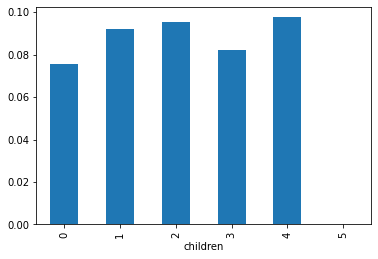

In [63]:
df.groupby('children')['debt'].mean().plot(kind='bar')

Видим, что группы с количеством детей 4 и 5 очень немногочисленны в сравнении с общим количеством, поэтому информация о зависимости наличия долга по кредиту по данным группам будет нерепрезентативна. Для корректного анализа можно данные группы объединить с группой, где 3 детей. При этом новую группу оставляем с целочисленным значением 3, т.к. если присваивать строковое значение `3 и более` для данной группы, например, то придется и для всех остальных числовых значений в столбце `children` менять тип на `str`, а это не очень верно для количественных переменных.

**Напишем функцию, которая будет менять значение в столбце `children` на 3, в случае если текущее значение в ячейке более 3.**

In [64]:
def children_number(number): # объявляем функцию с одним параметром
    try:                     # используем try-except на случай если в number будет не числовое значение
        if 3 < number:
            return 3         # если значение больше 3 детей, то возвращаем значение 3
        else:
            return number
    except:
        pass

**Применим теперь данную функцию к столбцу `children` со скорректированными значениями и посмотрим, как распределяется процент имевших задолженности в зависимости от количества детей и количество клиентов в каждой из данных групп. Для этого сделаем группировку по столбцу `children` для столбца `debt` и применим функции `agg()` в которой аргументами будут два метода `count` и `mean`.**

**Воспользуемся также методом `value_counts` с параметром `normalize=True` для оценки доли численности каждой группы по кол-ву детей во всем датафрейме**

In [65]:
df['children'] = df['children'].apply(children_number)
print(df.groupby('children')['debt'].agg(['count', 'mean']))
df['children'].value_counts(normalize=True)

          count      mean
children                 
0         14021  0.075458
1          4792  0.092028
2          2039  0.095145
3           378  0.082011


0    0.660433
1    0.225718
2    0.096043
3    0.017805
Name: children, dtype: float64

 **Построим теперь столбчатую диаграмму по обновленным значениям, отражающую зависимость доли имевших задолженность по возврату кредита от количества детей.**

<AxesSubplot:xlabel='children'>

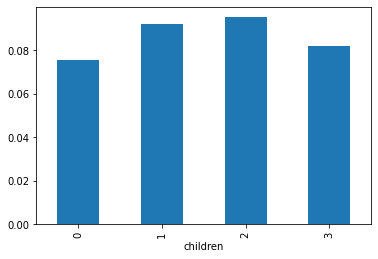

In [66]:
df.groupby('children')['debt'].mean().plot(kind='bar')

**Видим по диаграмме, что доля клиентов, имевших долг по возврату кредита, растет в зависимости от количества детей у клиента, однако, для значения `3` (3 и более детей), доля имевших долг по возврату кредита падает до уровня соответствующего значениям отсутствия детей и наличия одного ребенка. При этом минимальная доля имевших долг находится в самой многочисленной группе со значением 0 детей.** 

**Проверим как распределяются клиенты с разным количеством детей по категориям ежемесячного дохода. Для этого построим сводную таблицу с использованием метода `pivot_table()`, в которой в качестве значений возьмем информацию о наличии задолженности, при этом выведем долю с задолженностью с помощью метода `mean()` и количество записей для пересечения категорий дохода и количества детей с помощью метода `count()` для оценки возможности использования этих данных в нашем анализе.**

**Дополнительно для ориентирования в данных выведем "словарь" `total_income_dict` категорий уровня дохода.**

In [67]:
print(total_income_dict) # выводим словарь для категорий уровня дохода
t = pd.pivot_table(df,
               index=['children', 'total_income_category'],
               values='debt',
               aggfunc=['count','mean']) # создаем сводную таблицу 
t.columns = ['_'.join(col).strip() for col in t.columns.values] # код взят со stackoverflow.com, получаем 1 ур-ю таблицу 
t.sort_values(by='mean_debt') # сортируем по возрастанию значений доли должников

  total_income_category      min        max
0                     A  1000001        inf
1                     B   200001  1000000.0
2                     C    50001   200000.0
3                     D    30001    50000.0
4                     E        0    30000.0


count_debt  mean_debt
children total_income_category                       
1        E                               4   0.000000
3        A                               1   0.000000
2        E                               1   0.000000
         A                               3   0.000000
0        D                             241   0.049793
3        B                              99   0.050505
1        D                              66   0.060606
0        B                            3227   0.067865
1        B                            1164   0.075601
0        C                           10524   0.078297
2        B                             497   0.082495
0        A                              12   0.083333
3        C                             272   0.091912
1        C                            3549   0.098056
2        C                            1504   0.099069
1        A                               9   0.111111
2        D                              34   0.117647
0        E                              17   0.117647
3        D                               6   0.166667

**Количество записей для категорий `'A'` и `'E'` очень маленькое среди других значений, что будет только мешать анализу. Отбросим данные значения из нашей выборки, построим после фильтрации сводную таблицу с теми же двумя функциями `mean()` и `count()` и отсортируем ее по возрастанию.**

In [68]:
t = pd.pivot_table(df[(df['total_income_category'] != 'A')&(df['total_income_category'] != 'E')],
               index=['children', 'total_income_category'],
               values='debt',
               aggfunc=['count','mean']) # создаем сводную таблицу 
t.columns = ['_'.join(col).strip() for col in t.columns.values] # код взят со stackoverflow.com, получаем одноур-ю таблицу 
t.sort_values(by='mean_debt')

,,count_debt,mean_debt
children,total_income_category,,
0,D,241,0.049793
3,B,99,0.050505
1,D,66,0.060606
0,B,3227,0.067865
1,B,1164,0.075601
0,C,10524,0.078297
2,B,497,0.082495
3,C,272,0.091912
1,C,3549,0.098056


**Не удалось выявить какую-то явную связь между величиной дохода в группе с 3 детьми, объясняющую уменьшение доли должников при наличии 3 детей.**

**Продолжим исследование на другие связи.**

**Проверим как распределяются клиенты с разным количеством детей по целям кредита. Для этого построим сводную таблицу с использованием метода `pivot_table()`, в которой в качестве значений возьмем информацию о наличии задолженности, при этом выведем долю с задолженностью с помощью метода `mean()` и количество записей для пересечения целей кредита и количества детей с помощью метода `count()` для оценки возможности использования этих данных в нашем анализе.**

**Дополнительно для ориентирования в данных выведем "словарь" `purpose_dict` целей кредита.**

In [69]:
print(purpose_dict)
t = pd.pivot_table(df,
               index=['children', 'purpose_category_id'],
               values='debt',
               aggfunc=['count','mean']) # создаем сводную таблицу 
t.columns = ['_'.join(col).strip() for col in t.columns.values] # код взят со stackoverflow.com, получаем одноур-ю таблицу 
t.sort_values(by='mean_debt')

purpose_category_id
0      [операции с автомобилем]
1    [операции с недвижимостью]
2          [проведение свадьбы]
3       [получение образования]
Name: purpose_category, dtype: object


count_debt  mean_debt
children purpose_category_id                       
3        3                            77   0.051948
2        2                           215   0.055814
0        1                          7043   0.067301
         2                          1519   0.074391
1        1                          2442   0.081491
3        1                           193   0.082902
         0                            72   0.083333
0        0                          2832   0.085452
2        1                          1025   0.085854
0        3                          2627   0.087172
1        2                           529   0.096408
         3                           865   0.104046
         0                           956   0.105649
2        3                           401   0.114713
         0                           398   0.120603
3        2                            36   0.138889

**Видим, что большая доля группы с 3 детьми брала кредит под цель `операции с недвижимостью`. Проверим распределение долей должников по целям кредита во всем датафрейме и выведем в виде столбчатой диаграммы по возрастанию доли должников.**

<AxesSubplot:xlabel='purpose_category_id'>

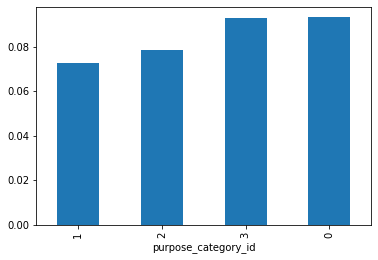

In [70]:
df.groupby('purpose_category_id')['debt'].mean().sort_values().plot(kind='bar')

**Видим, что наименьшая доля должников была в группе, где цель кредита были `операции с недвижимостью`. Здесь как раз и появляется возможное объяснение, почему в группе с 3 детьми мы получили меньшую долю должников, чем в группе с 2 детьми. Большая часть клиентов с 3 детьми брала кредит под улучшение жилищных условий, который обычно обеспечивается залогом той самой недвижимости. Однако, нужно также учитывать тот факт, что группа 3 и более детей крайне немногочисленна по количеству клиентов в сравнении с суммарным количеством клиентов в датафрейме и составляет всего 1.8%, что может означать ее нерепрезентативность**

**Вывод: видим, что доля клиентов, имевших долг по возврату кредита растет в зависимости от количества детей у клиента, однако, для значения `3` и более детей, доля имевших долг по возврату кредита падает, но численность данной группы клиентов составляет всего 1.8% от всех клиентов в датасете, что может давать неверные результаты вследствие нерепрезентативности данной группы.** 

#### 3.2 Проверим, есть ли зависимость между семейным положением и возвратом кредита в срок.

**Сгруппируем датафрейм таким образом, чтобы посмотреть, как распределяется доля имевших задолженность по возврату кредита в зависимости от семейного положения и количество клиентов в каждой из данных групп. Для этого сделаем группировку по столбцу `family_status_id` для столбца `debt` и применим функции `agg()` в которой аргументами будут два метода `count` и `mean`.**

**Воспользуемся также методом `value_counts` с параметром `normalize=True` для оценки доли численности каждой группы с различным семейным положением во всем датафрейме**

In [71]:
print(df.groupby('family_status_id')['debt'].agg(['mean', 'count']))
df['family_status_id'].value_counts(normalize=True)

                      mean  count
family_status_id                 
0                 0.075575  12213
1                 0.093142   4112
2                 0.065539    946
3                 0.071247   1179
4                 0.097842   2780


0    0.575271
1    0.193688
4    0.130947
3    0.055535
2    0.044560
Name: family_status_id, dtype: float64

**Построим теперь столбчатую диаграмму по возрастанию по значениям, отражающим долю имевших задолженности в зависимости от семейного положения . Дополнительно выведем "словарь" по данным значениям, чтобы проще было соотносить идентификатор и соответствующее ему значение семейного положения клиента.**

family_status_id
0          [женат / замужем]
1         [гражданский брак]
2           [вдовец / вдова]
3                [в разводе]
4    [не женат / не замужем]
Name: family_status, dtype: object


<AxesSubplot:xlabel='family_status_id'>

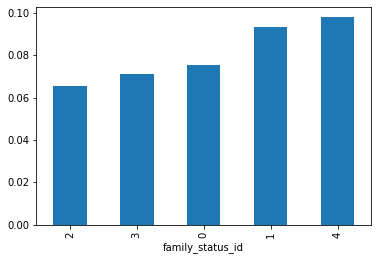

In [72]:
print(family_status_dict)
df.groupby('family_status_id')['debt'].mean().sort_values().plot(kind='bar')

**Вывод: видим, что доля наличия долга по возврату кредита выше среди тех клиентов, кто состоит в `гражданском браке` или `не женат / не замужем`, причем для значения `не женат / не замужем` доля имевших долг по возврату кредита самая высокая из всех. При этом для значения `вдовец / вдова` и `в разводе` доля имевших долг по возврату кредита самая низкая, но данные группы немногочисленны - 4.4% и 5.5% от общего количества клиентов в датасете соответственно.** 

#### 3.3 Проверим, есть ли зависимость между уровнем дохода и возвратом кредита в срок.

**Сгруппируем датафрейм таким образом, чтобы посмотреть, как распределяется доля имевших задолженность по возврату кредита в зависимости от уровня дохода и количество клиентов в каждой из данных групп. Для этого сделаем группировку по столбцу `total_income_category` для столбца `debt` и применим функции `agg()` в которой аргументами будут два метода `count` и `mean`.**

**Воспользуемся также методом `value_counts` с параметром `normalize=True` для оценки доли численности каждой категории во всем датафрейме**

In [73]:
print(df.groupby('total_income_category')['debt'].agg(['mean', 'count']))
df['total_income_category'].value_counts(normalize=True)

                           mean  count
total_income_category                 
A                      0.080000     25
B                      0.070784   4987
C                      0.084926  15849
D                      0.060519    347
E                      0.090909     22


C    0.746538
B    0.234903
D    0.016345
A    0.001178
E    0.001036
Name: total_income_category, dtype: float64

**Построим теперь столбчатую диаграмму, отражающую зависимость доли имевших задолженность по возврату кредита от уровня дохода. Дополнительно выведем "словарь" по данным значениям, чтобы проще было соотносить ключ и соответствующее ему значение диапазона уровня дохода клиента.**

  total_income_category      min        max
0                     A  1000001        inf
1                     B   200001  1000000.0
2                     C    50001   200000.0
3                     D    30001    50000.0
4                     E        0    30000.0


<AxesSubplot:xlabel='total_income_category'>

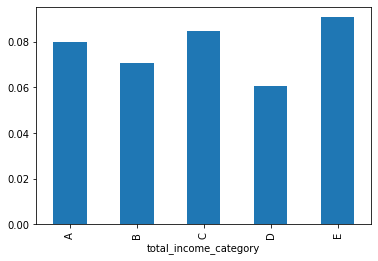

In [74]:
print(total_income_dict)
df.groupby('total_income_category')['debt'].mean().plot(kind='bar') # Ваш код будет здесь. Вы можете создавать новые ячейки.

**Видим, что количество данных в категориях дохода `'A'`, `'D'`, `'E'` слишком мало в сравнении с остальными категориями, чтобы брать в расчет доли должников по данным категориям, численность данных категорий от всего датасета 0.1%, 0.1% и 1.6% соответственно. Отбросим их при анализе.**

<AxesSubplot:xlabel='total_income_category'>

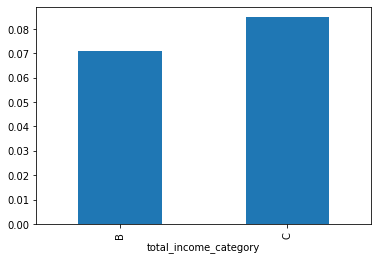

In [75]:
df[(df['total_income_category'] == 'B') | (df['total_income_category'] == 'C')].groupby('total_income_category')['debt'].mean().plot(kind='bar')

**Вывод: Видим, что чем уровень дохода клиента ниже, тем выше вероятность возникновения долга по кредиту.**

#### 3.4 Проверим, как разные цели кредита влияют на его возврат в срок.

**Сгруппируем датафрейм таким образом, чтобы посмотреть, как распределяется доля имевших задолженность по возврату кредита в зависимости от цели кредита и количество клиентов в каждой из данных групп. Для этого сделаем группировку по столбцу `purpose_category_id` для столбца `debt` и применим функции `agg()` в которой аргументами будут два метода `count` и `mean`.**

In [76]:
df.groupby('purpose_category_id')['debt'].agg(['mean', 'count']) # Ваш код будет здесь. Вы можете создавать новые ячейки.

,mean,count
purpose_category_id,,
0,0.093236,4258
1,0.072596,10703
2,0.078730,2299
3,0.092947,3970


**Построим теперь столбчатую диаграмму по возрастанию, отражающую зависимость доли имевших задолженность по возврату кредита от цели кредита. Дополнительно выведем "словарь" по данным значениям, чтобы проще было соотносить идентификатор и соответствующее ему значение цели кредита клиента.**

purpose_category_id
0      [операции с автомобилем]
1    [операции с недвижимостью]
2          [проведение свадьбы]
3       [получение образования]
Name: purpose_category, dtype: object


<AxesSubplot:xlabel='purpose_category_id'>

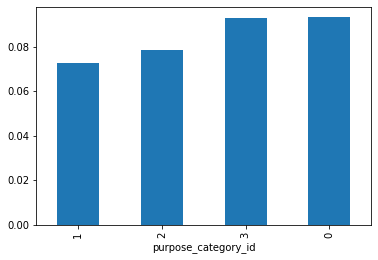

In [77]:
print(purpose_dict)
df.groupby('purpose_category_id')['debt'].mean().sort_values(ascending=True).plot(kind='bar', ylim=0)

**Вывод: автомобильные кредиты имеют наибольшую долю должников. При этом операции с недвижимостью имеют наименьшую долю должников.** 

#### 3.5 Возможные причины появления пропусков в исходных данных.

Причины могут быть связаны как с проблемой в выгрузке данных из исходных БД, так и с проблемами при внесении данных в исходную БД. Исходя из [исследования](#item_1_2), проведенного мной выше в п. 1.1 были обнаружены следующие особенности:*

- Пропуски в обоих столбцах `total_income` и `days_employed` относятся к одним и тем же строкам,
- Наименьший процент пропусков соответствует возрасту от 18 до 30 и от 62 до 73 лет,
- 71% пропусков соответствует значению `'среднее'`в столбце `education`,
- 57% пропусков соответствует значению `'женат / замужем'`в столбце `family_status`,
- 68% пропусков соответствует значению `'F'`в столбце `gender`,
- 51% пропусков соответствует значению `'сотрудник'`в столбце `income_type`,
- 92% пропусков соответствует значению `'0'`в столбце `debt`.

**Первая гипотеза:** пропуски в значениях дохода и общего трудового стажа связаны с человеческим фактором. 
Например, пользователи, заполняющие анкету для подачи заявки на кредит, не указали эти данные. Можно предположить, что это характерно для молодых мужчин\женщин, которые еще не имеют трудового стажа и постоянного дохода и оформляют кредит впервые. Однако, процент пропусков для возраста от 18 до 30 минимальный, хотя и наибольший процент пропусков характерен для людей, не имевших ранее долг по кредитам. 
Гипотеза не подтверждается из-за распределения пропусков относительно возраста людей. 
Также в случае пропуска этих полей в анкете заявителями мы скорее всего хотя бы в какой-то из строк увидели бы пропуски в двух столбцах в разных строках, в нашем же случае пропуски в двух столбцах относятся к одним и тем же строкам, что может говорить о каком-то системном характере данных пропусков.

**Вторая гипотеза:** пропуски в данных связаны с техническим фактором, и эти данные не были перенесены из БД, например, содержащей информацию о людях, не имеющих долгов (т.к. процент пропусков 92% для людей без долгов). В пользу этой гипотезы также говорит системный характер пропуска в обоих столбцах - т.е. пропуски в двух разных столбцах характерны только для одних и тех же строк (людей). * <a id='item_2_7_5'></a>

#### 3.6 Поясним, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Как понять, какое решение хуже или лучше при заполнении пропусков? Очень просто, заполнение пропусков не должно исказить результаты исследования данных в неверную сторону. Таким образом, нужно определить, какой вариант заполнения пропусков даст наименьшее искажение в результатах исследования. Как одну из характеристик выборки количественных переменных можно взять среднее значение данной выборки. Если среднее (не среднее арифметическое) значение выборки после заполнения пропусков не исказилось, можно считать, что мы минимально исказили результаты исследования, при условии, что общий процент пропусков в данной  выборке количественных переменных невелик, конечно же.

Как известно, среднее и медиана оценивают значения в центре выборки. Если значения количественных переменных в выборке распределены равномерно, то среднее арифметическое подходит для оценки среднего значения всей выборки. Но когда есть сильно выбивающиеся значения от основной массы значений в выборке количественных переменных, то данные значения сильно смещают значение среднего вверх или вниз. Вот почему оценивать среднее выборки количественных переменных с значениями в широком диапазоне лучше медианой. 

**Покажем разницу медианы и среднего арифметического в выборке с большим выбросом.**

In [78]:
import statistics # импортируем библиотеку для получения функции нахождения медианы и среднего арифметического в списке

list = [1]*9 + [100]*1 # создаем список из 9 элементов со значением 1 и одним элементов со значением 100

print('mean =', statistics.mean(list)) # выводим среднее арифметическое списка
print('median =', statistics.median(list)) # выводим медианное значение списка

mean = 10.9
median = 1.0


На данном примере наглядно видна разница между медианой и средним арифметическим в выборке с большими выбросами.

Рассмотрим теперь несколько вариантов заполнения пропусков. И посмотрим влияние каждого из вариантов на медианное значение выборки.
Очевидно, что в случае заполнения пропусков значением отличным от медианного, мы в той или иной степени сместим медиану всей выборки в сторону относительно ее исходного значения. И только в случае заполнения пропуском медианным значеним, медиана всей выборки не изменится, тем самым результат обработки данных минимально повлияет на результаты исследования, повторюсь, при небольшом проценте пропусков от общего числа количественных переменных в данной выборке.

**Проведем практический эксперимент. Заполним список из 1000 значений последовательностью чисел от 1 до 1000, при этом на каждое 10е значение списка поставим значительно большее число, создав в выборке так называемые выбросы значений. Посчитаем среднее арифметическое и медианное значения для данной выборки.**

In [79]:
data_analysis = [] # объявляем переменную, которая будет хранить выборку количественной переменной

for i in range(1000): # цикл для заполнения списка 1000 элементами
    if i % 10 == 0: # в случае если значение i кратно 10
        i += i * 20 # увеличиваем кратно 20 значение i для получения в списке элементов с большими выбросами
    data_analysis.append(i) # добавляем данный элемент в конец нашего списка
    
len_data = len(data_analysis) # записываем в переменную длину исходного списка
mean_data = statistics.mean(data_analysis) # записываем в переменную сред. арифм. исходного списка
median_data = statistics.median(data_analysis) # записываем в переменную медианное значение исходного списка

print('length data =', len_data) # выводим длину исходного списка
print('mean data =', mean_data) # выводим среднее арифметическое исходного списка
print('median data =', median_data) # выводим медианное значение исходного списка

length data = 1000
mean data = 1489.5
median data = 552.5


**Теперь в нашем списке из 1000 значений выделим в центре участок из 100 значений (10% от всей выборки), которые представим "пропусками". Посчитаем теперь среднее арифметическое и медианное значение новой выборки, которая отличается от исходной 10% пропусков всех значений в центре выборки.**

In [80]:
''' заполним новый список data_new значениями из исходного списка data, исключая 100 значений в исходной выборке, 
т.е. значения с индексами от 450 до 549 не будут включены в новый список'''
data_cut = [] # объявляем новый список

for i in range(len(data_analysis)): # идем по индексам старого списка
    if i  < 450 or i > 549: # если значение индекса элемента не в отрезке [450;549]
        data_cut.append(data_analysis[i]) # добавить элемент с данным индексом из исходного списка в новый

len_data_cut = len(data_cut) # записываем в переменную длину "урезанного" списка
mean_data_cut = statistics.mean(data_cut) # записываем в переменную сред. арифм. "урезанного" списка
median_data_cut = statistics.median(data_cut) # записываем в переменную медианное значение "урезанного" списка

print('length data_cut =', len_data_cut) # выводим длину "урезанного" списка
print('mean data_cut =', mean_data_cut) # выводим среднее арифметическое "урезанного" списка
print('median data_cut =', median_data_cut) # выводим медианное значение "урезанного" списка

length data_cut = 900
mean data_cut = 1489.5
median data_cut = 596.5


**Видим, что среднее арифметическое значение исходного списка и "урезанного" совпадают. Далее проверим, как замена "пропусков" исходного списка на различные значения будет влиять на медианное значение нового списка и сравним данное значение с медианным значением исходного списка без "пропусков".**

**Заполним сначала "пропуски" нулевыми значениями.**

In [81]:
data_new_zero = data_cut[:] # новый список, который будет аналогичен исходному, но в котором мы заменим 100 элементов в центре нулем

for i in range(450, 550): # идем только лишь по индексам от 450 до 549
    data_new_zero.insert(i, 0) # заполняем список значением 0 начиная от индекса 450, заканчивая индексом 549

len_data_new_zero = len(data_new_zero) # записываем в переменную длину нового списка
mean_data_new_zero = statistics.mean(data_new_zero) # записываем в переменную сред. арифм. нового списка
median_data_new_zero = statistics.median(data_new_zero) # записываем в переменную медианное значение нового списка

print('length data_new_zero =', len_data_new_zero) # выводим длину нового списка
print('mean data_new_zero =', mean_data_new_zero) # выводим среднее арифметическое нового списка
print('median data_new_zero =', median_data_new_zero) # выводим медианное значение нового списка

length data_new_zero = 1000
mean data_new_zero = 1340.55
median data_new_zero = 441.5


**Теперь заполним "пропуски" значениями среднего арифметического "урезанного" списка.**

In [82]:
data_new_mean = data_cut[:] # новый список, который будет аналогичен исходному, но в котором мы заменим 100 элементов в центре ср.арифм. "урезанного списка"

for i in range(450, 550): # идем только лишь по индексам от 450 до 549
    data_new_mean.insert(i, mean_data_cut) # заполняем список ср.арифм. значением "урезанного" списка начиная от индекса 450, заканчивая индексом 549

len_data_new_mean = len(data_new_mean) # записываем в переменную длину нового списка
mean_data_new_mean = statistics.mean(data_new_mean) # записываем в переменную сред. арифм. нового списка
median_data_new_mean = statistics.median(data_new_mean) # записываем в переменную медианное значение нового списка

print('length data_new_mean =', len_data_new_mean) # выводим длину нового списка
print('mean data_new_mean =', mean_data_new_mean) # выводим среднее арифметическое нового списка
print('median data_new_mean =', median_data_new_mean) # выводим медианное значение нового списка

length data_new_mean = 1000
mean data_new_mean = 1489.5
median data_new_mean = 651.5


**Теперь заполним "пропуски" значениями медианы "урезанного" списка.**

In [83]:
data_new_median = data_cut[:] # новый список, который будет аналогичен исходному, но в котором мы заменим 100 элементов в центре медианой "урезанного списка"

for i in range(450, 550): # идем только лишь по индексам от 450 до 549
    data_new_median.insert(i, median_data_cut) # заполняем список медианой "урезанного" списка начиная от индекса 450, заканчивая индексом 549

len_data_new_median = len(data_new_median) # записываем в переменную длину нового списка
mean_data_new_median = statistics.mean(data_new_median) # записываем в переменную сред. арифм. нового списка
median_data_new_median = statistics.median(data_new_median) # записываем в переменную медианное значение нового списка

print('length data_new_median =', len_data_new_median) # выводим длину нового списка
print('mean data_new_median =', mean_data_new_median) # выводим среднее арифметическое нового списка
print('median data_new_median =', median_data_new_median) # выводим медианное значение нового списка

length data_new_median = 1000
mean data_new_median = 1400.2
median data_new_median = 596.5


**Проанализируем полученные данные, создав из них таблицу.**

In [84]:
''' Создаем таблицу с полученными значениями среднего арифметического и медианы для каждого из полученных списков. 
Также отобразим в нижней строке разницу соответствующих значений по сравнению со значениями, 
относящимися к исходному полному списку.'''

gap_analysis = pd.DataFrame(
             {'func': ['mean', 'median', 'mean_diff_w_defualt', 'median_diff_w_defualt'],
              'default_list': [mean_data, median_data, 0, 0],
              'cut_list': [mean_data_cut, median_data_cut, mean_data_cut - mean_data, median_data_cut - median_data],
              'list_with_zero': [mean_data_new_zero, median_data_new_zero, mean_data_new_zero - mean_data, median_data_new_zero - median_data],
              'list_with_mean': [mean_data_new_mean, median_data_new_mean, mean_data_new_mean - mean_data, median_data_new_mean - median_data],
              'list_with_median': [mean_data_new_median, median_data_new_median, mean_data_new_median - mean_data, median_data_new_median - median_data_new_median]
             })
gap_analysis

,func,default_list,cut_list,list_with_zero,list_with_mean,list_with_median
0,mean,1489.5,1489.5,1340.55,1489.5,1400.2
1,median,552.5,596.5,441.50,651.5,596.5
2,mean_diff_w_defualt,0.0,0.0,-148.95,0.0,-89.3
3,median_diff_w_defualt,0.0,44.0,-111.00,99.0,0.0


**Отсюда можем сделать вывод, что наименьшая разница в медианном значении новой и исходной выборок количественной переменной получается в случае, если пропущенные значения в исходной выборке заполнить с помощью именно медианного значения среди известных значений исходной выборки. Среднее и медиана различаются, если в выборке присутствуют выбросы (значения, выделяющиеся из общей выборки). Медиана позволяет нивелировать их влияние.**

### Шаг 4: общий вывод.

**Исходя из каждого пункта мы выявили самые благонадежные группы клиентов. Проверим теперь комплексной фильтрацией датафрейма и используя сводные таблицы методом `pivot_table`, так ли это. Проверим долю должников для комбинации: клиенты без детей, которые берут кредит под операции с недвижимостью и которые (1)являются вдовой\вдовцом , (2) находятся в разводе и (3) женаты\замужем.**

**Также еще раз выведем общую долю должников во всем датасете как референтное значение.**

In [85]:
print(purpose_dict) # выводим словарь целей кредита
print('\n') # отделяем пустой строкой
print(family_status_dict) # выводим словарь статусов семейного положения
print('\n') # отделяем пустой строкой
print('Общая доля должников во всем датафрейме =',df['debt'].mean()) # выводим общую долю должников во всем датафрейме
t1 = pd.pivot_table(df,
               index=['children', 'purpose_category_id', 'family_status_id'],
               values='debt',
               aggfunc=['count','mean']) # создаем сводную таблицу 

t1.columns = [''.join(col).strip() for col in t.columns.values] # код взят со stackoverflow.com, получаем одноур-ю таблицу 
t1.sort_values(by='mean_debt').head(20) # сортируем по возрастанию доли должников и выводим первые 20 строк

purpose_category_id
0      [операции с автомобилем]
1    [операции с недвижимостью]
2          [проведение свадьбы]
3       [получение образования]
Name: purpose_category, dtype: object


family_status_id
0          [женат / замужем]
1         [гражданский брак]
2           [вдовец / вдова]
3                [в разводе]
4    [не женат / не замужем]
Name: family_status, dtype: object


Общая доля должников во всем датафрейме = 0.08120584079133301


count_debt  mean_debt
children purpose_category_id family_status_id                       
3        3                   4                          3   0.000000
         1                   2                          4   0.000000
                             1                         17   0.000000
         0                   4                          4   0.000000
                             3                          2   0.000000
2        3                   2                          2   0.000000
3        3                   2                          3   0.000000
1        0                   2                         11   0.000000
         3                   3                         61   0.032787
3        3                   0                         65   0.046154
0        1                   2                        469   0.046908
2        2                   1                        215   0.055814
         1                   3                         47   0.063830
0        1                   0                       4220   0.065640
         0                   3                        192   0.067708
3        0                   0                         59   0.067797
0        1                   3                        427   0.067916
         3                   2                        174   0.068966
2        3                   4                         14   0.071429
1        1                   3                        182   0.071429

**Первая в списке комплексная группа, имеющая репрезентативное количество участников (4220 чел) и наименьшую долю должников (0,0656) соответствует следующим значениям: `children = 0`, `purpose_category_id = 1`, `family_status_id = 0`, что подтверждаем нашу итоговую гипотезу - клиент без детей, имеющий цель кредита - операции с недвижимостью и семейный статус женат\замужем - самый надежный заемщик.**

**Исходя из каждого пункта мы выявили самые благонадежные группы клиентов. Проверим теперь комплексной фильтрацией датафрейма и используя сводные таблицы методом `pivot_table`, так ли это. Проверим долю должников для комбинации: клиенты с категорией высокого дохода, без детей, которые берут кредит под операции с недвижимостью и которые (1) являются вдовой\вдовцом, 
(2) находятся в разводе и (3) женаты\замужем.**

**Также еще раз выведем общую долю должников во всем датасете как референтное значение.**

In [86]:
print(total_income_dict) # выводим словарь категории дохода
print('\n') # отделяем пустой строкой
print(purpose_dict) # выводим словарь целей кредита
print('\n') # отделяем пустой строкой
print(family_status_dict) # выводим словарь статусов семейного положения
print('\n') # отделяем пустой строкой
print('Общая доля должников во всем датафрейме =',df['debt'].mean()) # выводим общую долю должников во всем датафрейме
t1 = pd.pivot_table(df,
               index=['total_income_category', 'children', 'purpose_category_id', 'family_status_id'],
               values='debt',
               aggfunc=['count','mean']) # создаем сводную таблицу 

t1.columns = [''.join(col).strip() for col in t.columns.values] # код взят со stackoverflow.com, получаем одноур-ю таблицу 
t1[t1['count_debt'] > 100].sort_values(by='mean_debt').head(20)  
# отберем пересекающиеся выборки, где более 100 участников, сортируем по возрастанию доли должников и выводим первые 20 строк

  total_income_category      min        max
0                     A  1000001        inf
1                     B   200001  1000000.0
2                     C    50001   200000.0
3                     D    30001    50000.0
4                     E        0    30000.0


purpose_category_id
0      [операции с автомобилем]
1    [операции с недвижимостью]
2          [проведение свадьбы]
3       [получение образования]
Name: purpose_category, dtype: object


family_status_id
0          [женат / замужем]
1         [гражданский брак]
2           [вдовец / вдова]
3                [в разводе]
4    [не женат / не замужем]
Name: family_status, dtype: object


Общая доля должников во всем датафрейме = 0.08120584079133301


count_debt  \
total_income_category children purpose_category_id family_status_id               
B                     1        2                   1                        126   
C                     0        1                   2                        381   
B                     0        1                   1                        145   
                               3                   0                        359   
                      2        1                   0                        223   
                      0        1                   0                        993   
                               2                   1                        349   
                               1                   3                        110   
C                     2        2                   1                        155   
                      0        1                   0                       3132   
                               3                   2                        147   
                               0                   0                       1227   
                               1                   3                        311   
B                     1        0                   0                        182   
C                     0        3                   3                        126   
B                     1        1                   0                        417   
C                     1        1                   3                        139   
                                                   0                       1254   
                      0        1                   4                        950   
B                     1        3                   0                        131   

                                                                     mean_debt  
total_income_category children purpose_category_id family_status_id             
B                     1        2                   1                  0.031746  
C                     0        1                   2                  0.049869  
B                     0        1                   1                  0.055172  
                               3                   0                  0.055710  
                      2        1                   0                  0.058296  
                      0        1                   0                  0.061430  
                               2                   1                  0.063037  
                               1                   3                  0.063636  
C                     2        2                   1                  0.064516  
                      0        1                   0                  0.067369  
                               3                   2                  0.068027  
                               0                   0                  0.070090  
                               1                   3                  0.070740  
B                     1        0                   0                  0.071429  
C                     0        3                   3                  0.071429  
B                     1        1                   0                  0.071942  
C                     1        1                   3                  0.071942  
                                                   0                  0.072568  
                      0        1                   4                  0.074737  
B                     1        3                   0                  0.076336

**Первые две в списке комплексных группы, имеющих репрезентативное количество участников (993 и 3132 чел) и наименьшую долю должников (0.0614 и 0.674) соответствует следующим значениям: `total_income_category = B или C` `children = 0`, `purpose_category_id = 1`, `family_status_id = 0`, что подтверждаем нашу итоговую гипотезу - клиент приоритетнее с доходом более 200 тыс. руб или хотя бы более 50 тыс. руб, без детей, имеющий цель кредита - операции с недвижимостью и семейный статус женат\замужем - самый надежный заемщик.**

**Проверим теперь, какой клиент для банка является самым рисковым с точки зрения возврата кредита в срок. Для этого оценим "хвост" нашей фильтрованной сводной таблицы.**

In [87]:
print(total_income_dict) # выводим словарь категории дохода
print('\n') # отделяем пустой строкой
print(purpose_dict) # выводим словарь целей кредита
print('\n') # отделяем пустой строкой
print(family_status_dict) # выводим словарь статусов семейного положения
print('\n') # отделяем пустой строкой
print('Общая доля должников во всем датафрейме =',df['debt'].mean()) # выводим общую долю должников во всем датафрейме
t1[t1['count_debt'] > 100].sort_values(by='mean_debt', ascending=False).head(20) 
# отберем пересекающиеся выборки, где более 100 участников, сортируем по убыванию доли должников и выводим первые 20 строк

  total_income_category      min        max
0                     A  1000001        inf
1                     B   200001  1000000.0
2                     C    50001   200000.0
3                     D    30001    50000.0
4                     E        0    30000.0


purpose_category_id
0      [операции с автомобилем]
1    [операции с недвижимостью]
2          [проведение свадьбы]
3       [получение образования]
Name: purpose_category, dtype: object


family_status_id
0          [женат / замужем]
1         [гражданский брак]
2           [вдовец / вдова]
3                [в разводе]
4    [не женат / не замужем]
Name: family_status, dtype: object


Общая доля должников во всем датафрейме = 0.08120584079133301


count_debt  \
total_income_category children purpose_category_id family_status_id               
C                     0        3                   1                        195   
                      1        1                   1                        190   
                      0        0                   4                        396   
B                     0        0                   4                        118   
C                     1        2                   1                        395   
                      0        3                   4                        335   
                      2        3                   0                        253   
                      0        0                   1                        208   
                      2        0                   0                        233   
                      1        1                   4                        188   
B                     0        3                   4                        113   
C                     1        3                   0                        450   
                               0                   0                        482   
                      0        0                   2                        165   
                      3        1                   0                        117   
                      2        1                   0                        629   
                      0        1                   1                        491   
                               0                   3                        141   
                               3                   0                       1176   
                               2                   1                       1143   

                                                                     mean_debt  
total_income_category children purpose_category_id family_status_id             
C                     0        3                   1                  0.148718  
                      1        1                   1                  0.136842  
                      0        0                   4                  0.123737  
B                     0        0                   4                  0.118644  
C                     1        2                   1                  0.116456  
                      0        3                   4                  0.113433  
                      2        3                   0                  0.110672  
                      0        0                   1                  0.110577  
                      2        0                   0                  0.107296  
                      1        1                   4                  0.106383  
B                     0        3                   4                  0.106195  
C                     1        3                   0                  0.104444  
                               0                   0                  0.101660  
                      0        0                   2                  0.096970  
                      3        1                   0                  0.094017  
                      2        1                   0                  0.092210  
                      0        1                   1                  0.085540  
                               0                   3                  0.085106  
                               3                   0                  0.082483  
                               2                   1                  0.078740

**Видим, что большая часть должников сосредоточена в категории `'C'`, поэтому сделаем новую группировку датафрейма и по нему создадим новую сводную таблицу, уже более "читаемую".**

In [88]:
display(total_income_dict) # выводим словарь категории дохода
#display()# отделяем пустой строкой
display(purpose_dict) # выводим словарь целей кредита
#display() # отделяем пустой строкой
display(family_status_dict) # выводим словарь статусов семейного положения
#display() # отделяем пустой строкой
display('Общая доля должников во всем датафрейме:',df['debt'].mean()) # выводим общую долю должников во всем датафрейме
t1 = t1.query('total_income_category == "C"') # фильтруем датафрейм по категории "C"
t1[t1['count_debt'] > 100].sort_values(by='mean_debt', ascending=False).head(20) 
# отберем пересекающиеся выборки, где более 100 участников, сортируем по убыванию доли должников и выводим первые 20 строк

,total_income_category,min,max
0,A,1000001,inf
1,B,200001,1000000.0
2,C,50001,200000.0
3,D,30001,50000.0
4,E,0,30000.0


purpose_category_id
0      [операции с автомобилем]
1    [операции с недвижимостью]
2          [проведение свадьбы]
3       [получение образования]
Name: purpose_category, dtype: object

family_status_id
0          [женат / замужем]
1         [гражданский брак]
2           [вдовец / вдова]
3                [в разводе]
4    [не женат / не замужем]
Name: family_status, dtype: object

'Общая доля должников во всем датафрейме:'

0.08120584079133301

count_debt  \
total_income_category children purpose_category_id family_status_id               
C                     0        3                   1                        195   
                      1        1                   1                        190   
                      0        0                   4                        396   
                      1        2                   1                        395   
                      0        3                   4                        335   
                      2        3                   0                        253   
                      0        0                   1                        208   
                      2        0                   0                        233   
                      1        1                   4                        188   
                               3                   0                        450   
                               0                   0                        482   
                      0        0                   2                        165   
                      3        1                   0                        117   
                      2        1                   0                        629   
                      0        1                   1                        491   
                               0                   3                        141   
                               3                   0                       1176   
                               2                   1                       1143   
                               1                   4                        950   
                      1        1                   0                       1254   

                                                                     mean_debt  
total_income_category children purpose_category_id family_status_id             
C                     0        3                   1                  0.148718  
                      1        1                   1                  0.136842  
                      0        0                   4                  0.123737  
                      1        2                   1                  0.116456  
                      0        3                   4                  0.113433  
                      2        3                   0                  0.110672  
                      0        0                   1                  0.110577  
                      2        0                   0                  0.107296  
                      1        1                   4                  0.106383  
                               3                   0                  0.104444  
                               0                   0                  0.101660  
                      0        0                   2                  0.096970  
                      3        1                   0                  0.094017  
                      2        1                   0                  0.092210  
                      0        1                   1                  0.085540  
                               0                   3                  0.085106  
                               3                   0                  0.082483  
                               2                   1                  0.078740  
                               1                   4                  0.074737  
                      1        1                   0                  0.072568

**Текущая версия сводной таблицы показывает, что все комплексные группы теперь не такие многочисленные. Поэтому возьмем первую в списке группу с количеством человек около 400 и имеющуюу наибольшую долю должников (0.0124). Данная группа соответствует следующим значениям: `total_income_category = C` `children = 0`, `purpose_category_id = 0`, `family_status_id = 4`, что соответствует следующим данным - клиент с небольшим доходом до 200 тыс. руб, без детей, имеющий цель кредита - операции с автомобилем и семейный статус не женат\ не замужем - т.е. это портрет самого ненадежного заемщика для банка.**